# 데이터베이스<br>
데이터베이스는 데이터를 저장하는 공간으로서, **서비스를 개발**하는 곳에서는 빠질 수 없는 중요한 요소입니다.<br>
데이터베이스의 종류에는 크게 *관계형 데이터베이스(RDB)와 NoSQL(Not Only SQL)로 나누어져 있습니다.

### 관계형 데이터베이스 <br>
key와 value들의 간단한 관계를 테이블 화 시킨 데이터베이스<br>
관계형 데이타 모델이란 데이타를 구성하는데 필요한 방법 중 하나로 모든 데이타를 2차원의 테이블 형태로 표현해줍니다. 관계형 데이타 모델의 개념은 표현 개체의 외부개념 관례를 적용한 것으로, 데이타 간의 상관관계에서 개체간의 관계를 표현한 것이라고 할 수 있습니다.

RDB는 데이타의 독립성이 높고, 고수준의 데이타 조작언어(DML-Data Manipulation Language)을 사용하여 결합, 제약, 투영 등의 관계 조작에 의해 비약적으로 표현능력을 높일 수 있습니다. 또한 이들의 관계 조작에 의해 자유롭게 구조를 변경할 수 있다는 것이 RDB의 특징입니다.


#### RDB특징

- DML을 사용해서 데이터 간 결합, 제약조건 등의 설정을 통해 데이터를 추출할 수 있습니다.<br>
- 테이블 가느이 데이터 관계를 설정할 수 있습니다.

#### RDB의 종류
Oracle, MySQL, MS-SQL, DB2, Maria DB, Derby, SQLite

#### RDB의 형태
- RDB는 정형화된 데이터를 저장하고 있다.
- 각 컬럼마다 데이터의 형태가 동일하다.
- SQL질의어(쿼리)를 사용한다.

# RDB와 Flask<br>
파이썬은 오픈소스와 상용 데이터베이스에 대한 대부분의 데이터베이스 엔진을 위한 패키지를 가지고 있다.<br>
Flask에서 입력받은 내용을 DB에 저장할 수 있다 -> 효율적인 데이터 관리 가능 

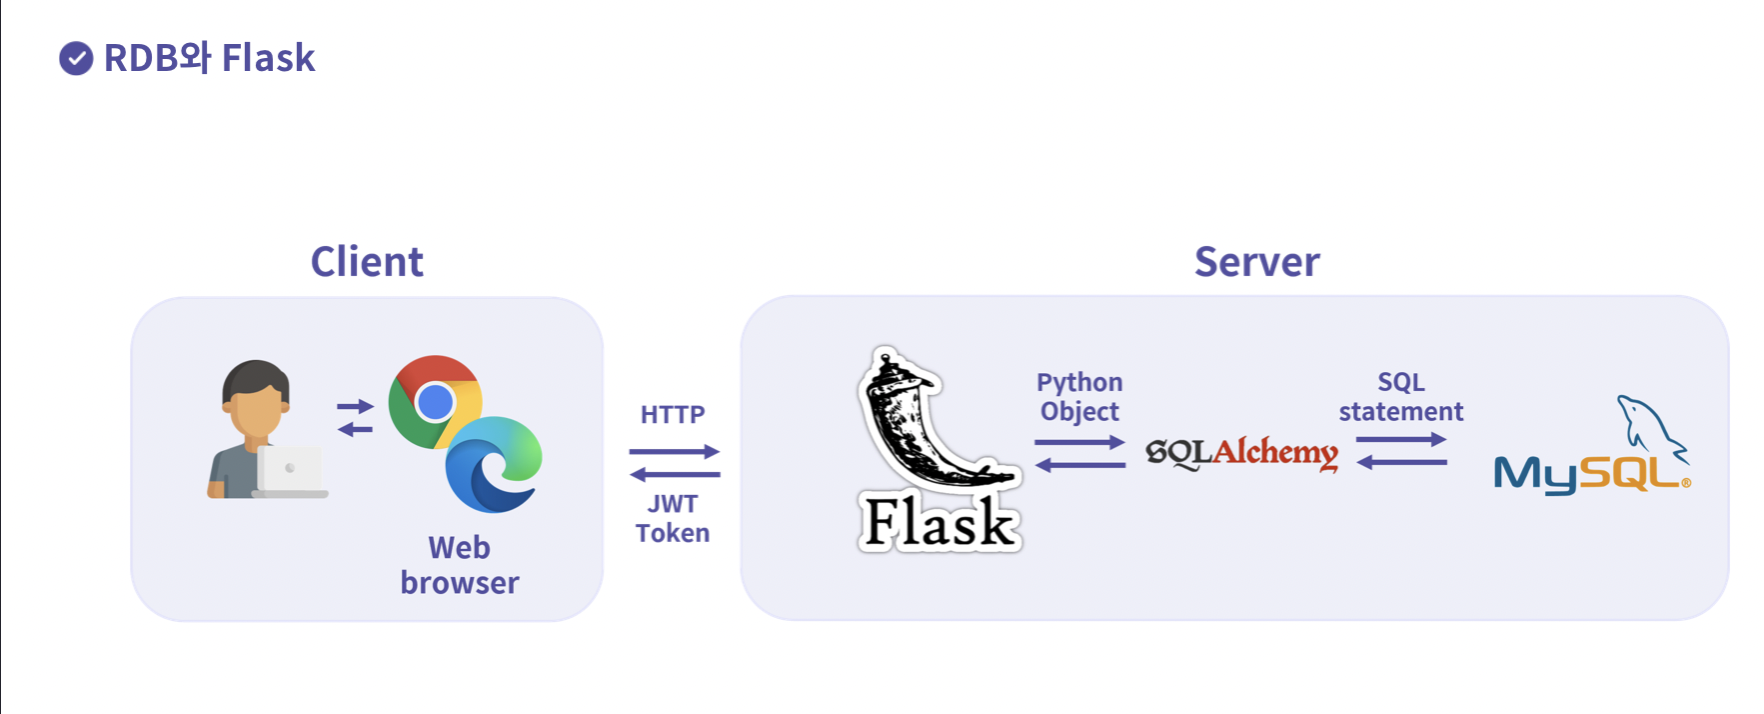

In [2]:
Image("rf.png")

# 사용자 정보 검색실습<br>
### 지시사항
1. sqlite3를 임포트하세요.
2. database.db와 connect()한 객체 con을 만드세요.
3. con에 cursor() 값인 cur를 만드세요.
4. cur에 form을 통해 전달받은 result가 DB의 name 또는 context에 있는지 찾는 쿼리문을 실행하세요.
5. 쿼리문 실행 결과를 fetchall()을 사용하여 rows에 저장하세요.
6. con을 close()를 사용해 DB와의 연결을 종료하세요.

```python
from flask import Flask, render_template, request, url_for, redirect
# sqlite를 import 하세요.
import sqlite3

app = Flask(__name__)
conn = sqlite3.connect('database.db')
print ("Opened database successfully")
conn.execute('CREATE TABLE IF NOT EXISTS Board (name TEXT, context TEXT)')
print ("Table created successfully")
value = [['Elice', 15], ['Dodo', 16], ['Checher', 17], ['Queen', 18]]
for i in range(4):
    conn.execute(f"INSERT INTO Board(name, context) VALUES('{value[i][0]}', '{value[i][1]}')")
conn.commit()
conn.close()


@app.route('/')
def board():
    con = sqlite3.connect("database.db")
    cur = con.cursor()
    cur.execute("select * from Board")
    rows = cur.fetchall()
    con.close()
    print("DB:")
    for i in range(len(rows)):
            print(rows[i][0] + ':' + rows[i][1])
    return render_template('board.html', rows = rows)

@app.route('/search', methods = ['GET', 'POST'])
def search():
    if request.method == 'POST':
        result = request.form['search']
        # 데이터베이스를 연결하세요.
        con = sqlite3.connect("database.db")
        
        # cursor 객체를 만드세요.
        cur = con.cursor()
        # Board 테이블에서 요청받은 result가 있는지 찾는 쿼리를 실행하세요.
        cur.execute(f"SELECT * FROM Board WHERE name = '{result}' or context = '{result}'")
        # 쿼리 실행 결과를 rows 변수에 저장하세요.
        rows = cur.fetchall() #다량의 데이터를 추출할 때는 cursor()와 fetchall()을 사용
        # DB의 연결을 해제하세요.
        con.close()
        print("DB:")
        for i in range(len(rows)):
            print(rows[i][0] + ':' + rows[i][1])
        return render_template('search.html', rows = rows)
    else:
        return render_template('search.html')

if __name__ == '__main__':
    app.run(debug=True)
```

# DB사용자추가 실습<br>

1. add.html의 form에서 name, context 값을 가져와 name, context에 저장하세요.
2. execute()를 실행해 쿼리문을 사용해 name, context 값을 DB에 추가하세요.
3. 수정된 DB가 반영되도록 commit() 명령어를 추가하세요.

```python
from flask import Flask, render_template, request, url_for, redirect
import sqlite3

app = Flask(__name__)
conn = sqlite3.connect('database.db')
print ("Opened database successfully")
conn.execute('CREATE TABLE IF NOT EXISTS Board (name TEXT, context TEXT)')
print ("Table created successfully")
name = [['Elice', 15], ['Dodo', 16], ['Checher', 17], ['Queen', 18]]
for i in range(4):
    conn.execute(f"INSERT INTO Board(name, context) VALUES('{name[i][0]}', '{name[i][1]}')")
conn.commit()
conn.close()


@app.route('/')
def board():
    con = sqlite3.connect("database.db")
    cur = con.cursor()
    cur.execute("select * from Board")
    rows = cur.fetchall()
    print("DB:")
    for i in range(len(rows)):
            print(rows[i][0] + ':' + rows[i][1])
    return render_template('board.html', rows = rows)


@app.route('/search', methods = ['GET', 'POST'])
def search():
    if request.method == 'POST':
        search = request.form['search']
        con = sqlite3.connect("database.db")
        cur = con.cursor()
        cur.execute(f"SELECT * FROM Board WHERE name='{search}' or context='{search}'")
        rows = cur.fetchall()
        print("DB:")
        for i in range(len(rows)):
            print(rows[i][0] + ':' + rows[i][1])
        return render_template('search.html', rows = rows)
    else:
        return render_template('search.html')

@app.route('/add', methods = ['GET', 'POST'])
def add():
    if request.method == 'POST':
        try:
            # 요청된 name, context 값을 가져오세요.
            name = request.form['name']
            context = request.form['context']
            
            with sqlite3.connect("database.db") as con:
                cur = con.cursor()
                # 가져온 값을 cursor 객체에 저장하세요.
                cur.execute(f"INSERT INTO Board (name, context) VALUES('{name}','{context}')")
                # commit 명령어를 이용해 DB에 반영하세요.
                con.commit()
        except:
            con.rollback()
        finally : 
            return redirect(url_for('board'))
    else:
        return render_template('add.html')

if __name__ == '__main__':
    app.run(debug=True)
```

# 중복 사용자 방지 실습<br>
1. 쿼리문을 활용하여 name이 DB 상에 존재하지 않으면 사용자를 추가하도록 조건문을 작성하세요.
2. DB 상에 이미 사용자가 있으면 else 조건문으로 중복 사용자임을 알 수 있도록 add.html의 msg에 값을 넘기세요.

- “중복 사용자입니다. 이름을 바꿔주세요.” 라는 값을 넘기세요.

```python
from flask import Flask, render_template, request, url_for, redirect
import sqlite3

app = Flask(__name__)
conn = sqlite3.connect('database.db')
print ("Opened database successfully")
conn.execute('CREATE TABLE IF NOT EXISTS Board (name TEXT, context TEXT)')
print ("Table created successfully")
name = [['Elice', 15], ['Dodo', 16], ['Checher', 17], ['Queen', 18]]
for i in range(4):
    conn.execute(f"INSERT INTO Board(name, context) VALUES('{name[i][0]}', '{name[i][1]}')")
conn.commit()
conn.close()


@app.route('/')
def board():
    con = sqlite3.connect("database.db")
    cur = con.cursor()
    cur.execute("select * from Board")
    rows = cur.fetchall()
    print("DB:")
    for i in range(len(rows)):
            print(rows[i][0] + ':' + rows[i][1])
    return render_template('board.html', rows = rows)

@app.route('/search', methods = ['GET', 'POST'])
def search():
    if request.method == 'POST':
        search = request.form['search']
        con = sqlite3.connect("database.db")
        cur = con.cursor()
        cur.execute(f"SELECT * FROM Board WHERE name='{search}' or context='{search}'")
        rows = cur.fetchall()
        print("DB:")
        for i in range(len(rows)):
            print(rows[i][0] + ':' + rows[i][1])
        return render_template('search.html', rows = rows)
    else:
        return render_template('search.html', msg = "검색어를 입력해주세요.")

@app.route('/add', methods = ['GET', 'POST'])
def add():
    if request.method == 'POST':
        name = request.form['name']
        context = request.form['context']
        with sqlite3.connect("database.db") as con:
            cur = con.cursor()
            # name이 DB에 있는지 확인 후 사용자를 DB에 추가하세요.
            cur.execute(f"SELECT count('name') FROM Board WHERE name = '{name}'")
            if cur.fetchall()[0][0] == 0:
                cur.execute(f"INSERT INTO Board (name, context) VALUES ('{name}', '{context}')")
                con.commit()
            else:
                # 중복 사용자인 경우 안내 메시지를 넘긴 후 add.html을 렌더링하세요.
                return render_template('add.html', msg="중복 사용자입니다. 이름을 바꿔주세요.")
        return redirect(url_for('board'))
    else:
        return render_template('add.html')
if __name__ == '__main__':
    app.run(debug=True)
```

# 게시판 내용 수정 및 삭제<br>
1. UPDATE ~ SET ~ WHERE를 사용해서 수정 기능을 수행하는 쿼리문을 작성하세요.
2. DELETE FROM ~ WHERE를 사용해서 삭제 기능을 수행하는 쿼리문을 작성하세요.

```python
from flask import Flask, render_template, request, url_for, redirect
import sqlite3
import sys

app = Flask(__name__)
conn = sqlite3.connect('database.db')
print ("Opened database successfully", file=sys.stderr)
conn.execute('CREATE TABLE IF NOT EXISTS Board (name TEXT, context TEXT)')
print ("Table created successfully", file=sys.stderr)
name = [['Elice', 15], ['Dodo', 16], ['Checher', 17], ['Queen', 18]]
for i in range(4):
    conn.execute(f"INSERT INTO Board(name, context) VALUES('{name[i][0]}', '{name[i][1]}')")
conn.commit()
conn.close()


@app.route('/')
def board():
    con = sqlite3.connect("database.db")
    cur = con.cursor()
    cur.execute("select * from Board")
    rows = cur.fetchall()
    print("DB:", file=sys.stderr)
    for i in range(len(rows)):
            print(rows[i][0] + ':' + rows[i][1], file=sys.stderr)
    return render_template('board.html', rows = rows)


@app.route('/search', methods = ['GET', 'POST'])
def search():
    if request.method == 'POST':
        search = request.form['search']
        con = sqlite3.connect("database.db")
        cur = con.cursor()
        cur.execute(f"SELECT * FROM Board WHERE name='{search}' or context='{search}'")
        rows = cur.fetchall()
        print("DB:", file=sys.stderr)
        for i in range(len(rows)):
            print(rows[i][0] + ':' + rows[i][1], file=sys.stderr)
        return render_template('search.html', rows = rows)
    else:
        return render_template('search.html')


@app.route('/add', methods = ['GET', 'POST'])
def add():
    if request.method == 'POST':
        try:
            name = request.form['name']
            context = request.form['context']
            with sqlite3.connect("database.db") as con:
                cur = con.cursor()
                cur.execute(f"INSERT INTO Board (name, context) VALUES ('{name}', '{context}')")
                con.commit()
        except:
            con.rollback()
        finally : 
            con.close()
            return redirect(url_for('board'))
    else:
        return render_template('add.html')


@app.route('/update/<uid>', methods=['GET','POST'])
def update(uid):
    if request.method =='POST':
        name = request.form['name']
        context = request.form['context']
        with sqlite3.connect("database.db") as con:
            cur = con.cursor()
            # UPDATE 문을 이용해 name과 context를 수정하는 쿼리를 실행하세요.
            cur.execute(f"UPDATE Board Set name ='{name}', context='{context}' WHERE name ='{uid}'")


            con.commit()
        return redirect(url_for('board'))
    else:
        con = sqlite3.connect("database.db")
        cur = con.cursor()
        cur.execute(f"SELECT * FROM Board WHERE name ='{uid}'")
        row = cur.fetchall()
        return render_template('update.html',row=row)


@app.route('/delete/<uid>')
def delete(uid):
    with sqlite3.connect("database.db") as con:
            cur = con.cursor()
            #  DELETE 문을 이용해 데이터를 삭제하는 쿼리를 실행하세요.
            cur.execute(f"DELETE FROM Board WHERE name ='{uid}'")
            con.commit()
    return redirect(url_for('board'))


if __name__ == '__main__':
    app.run(debug=True)
```